# Assignment 1

Matthew Rossouw (z5220299)
2022T2

In [27]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
import cv2
def mplib_show(img):
    """
    Shows an image using matplotlib because cv2 crashes in WSL.
    """
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

## Task 1: Background estimation


In [70]:
def min_filter(img: np.ndarray, min_n : np.uint) -> np.ndarray:
    """
    Given a greyscale image, produce the min-filtered output.

    Args:
        img: a greyscale image
    Returns:
        A greyscale image, min-filtered
    """
    assert(min_n % 2) # die if min_n is not odd
    assert(min_n > 1) # die if asked to do nothing
    # Create a new image
    out = img.copy()

    (iy, ix, ic) = img.shape
    steps = 0
    # Iterate over input image
    for y in range(0,iy):
        for x in range(0,ix):
            _min = 1<<8
            out[y][x] = (0,0,0)

            filter_bound = int((min_n-1)/2) # separated for faster loop performance

            # Apply min filter
            for yy in range(-filter_bound, 1 + filter_bound):
                for xx in range(-filter_bound, 1 + filter_bound):
                    # Skip out of bounds pixels instead of clamping -> 53 million to 52 million steps, 63 seconds to 38 seconds
                    if (xx+x) < 0 or (yy+y) < 0 or (xx+x) >= ix or (yy+y) >= iy:
                        continue
                    
                    steps += 1
                    px = img[yy+y][xx+x][0]
                    # Check if this pixel is the new minimum
                    if _min > px:
                        _min = px
            # Set the min value for this pixel in output
            out[y][x] = (_min, _min, _min)
    return out

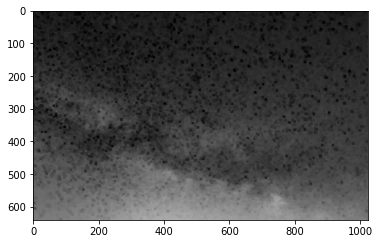

In [74]:
# Test for background estimation - min
milkyway = cv2.imread("Milkyway.png")
out = min_filter(milkyway, 7)
mplib_show(out)

In [62]:
def max_filter(img: np.ndarray, max_n: np.uint) -> np.ndarray:
    """
    Given a greyscale image, produce the max-filtered output.

    Args:
        img: a greyscale image
    Returns:
        A greyscale image, max-filtered
    """
    assert(max_n % 2) # die if max_n is not odd
    assert(max_n > 1) # die if asked to do nothing
    # Create a new image
    out = img.copy()

    (iy, ix, ic) = img.shape

    # Iterate over input image
    for y in range(0,iy):
        for x in range(0,ix):
            _max = 0
            out[y][x] = (0,0,0)
            filter_bound = int((max_n-1)/2) # separated for faster loop performance
            # Apply max filter
            for yy in range(-filter_bound, 1 + filter_bound):
                for xx in range(-filter_bound, 1 + filter_bound):
                    # Skip out of bounds pixels instead of clamping -> 53 million to 52 million steps, 63 seconds to 38 seconds
                    if (xx+x) < 0 or (yy+y) < 0 or (xx+x) >= ix or (yy+y) >= iy:
                        continue
                    
                    px = img[yy+y][xx+x][0]
                    # Check if this pixel is the new maximum
                    if _max < px:
                        _max = px
            # Set the max value for this pixel in output
            out[y][x] = (_max, _max, _max)
    return out

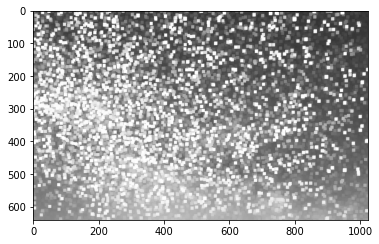

In [63]:
# Test for background estimation - max
milkyway = cv2.imread("Milkyway.png")
out = max_filter(milkyway, 7)
mplib_show(out)

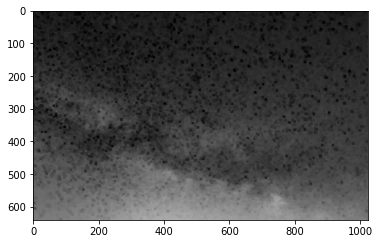

In [75]:
# Test for background estimation - composite
milkyway = cv2.imread("Milkyway.png")
A = min_filter(milkyway, 7)
B = max_filter(A, 7)
mplib_show(B)

## Task 2: Background subtraction


In [76]:
def remove_background(img : np.ndarray, n : np.uint) -> np.ndarray:
    """
    Given a greyscale image, removes the background using a combined min and max filter.
    Args:
        img: a greyscale image
        n: size of filter kernel. Must be an odd number.
    Returns:
        img with background removed.
    """
    A = min_filter(img, n)
    B = max_filter(A, n)
    out = img.copy()
    out = img - B
    return out

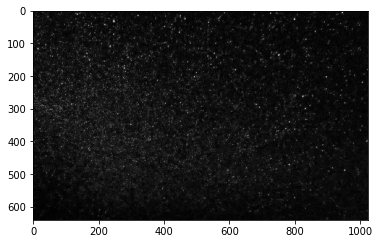

In [77]:
# Test for removing background.
milkyway = cv2.imread("Milkyway.png")
O = remove_background(milkyway, 7)
mplib_show(O)

## Task 3: extension


In [103]:
def _remove_background(img : np.ndarray, n : np.uint, m: bool) -> np.ndarray:
    """
    Given a greyscale image, removes the background using a combined min and max filter.
    Args:
        img: a greyscale image
        n: size of filter kernel. Must be an odd number.
        m: order of operations. if false, min filtering is first. otherwise, max filtering is first.
    Returns:
        img with background removed.
    """
    out = img.copy()
    if m:
        A = max_filter(img, n)
        B = min_filter(A, n)
        out = img - B + 255
    else:
        A = min_filter(img, n)
        B = max_filter(A, n)
        out = img - B
    return out

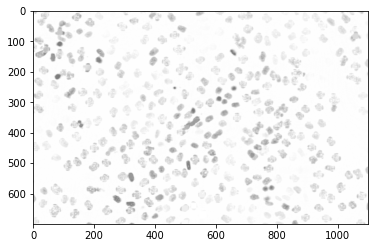

In [105]:
# test for task 3
cells = cv2.imread("Cells.png")
out = _remove_background(cells, 17, True)
mplib_show(out)

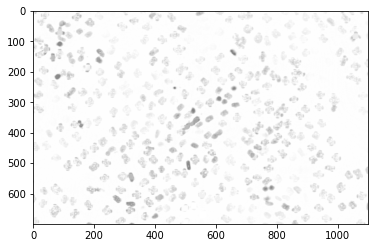

In [100]:

cells = cv2.imread("Cells.png")
out = _remove_background(cells, 15, True)
mplib_show(out)

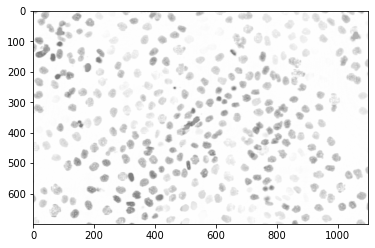

In [106]:
cells = cv2.imread("Cells.png")
out = _remove_background(cells, 21, True)
mplib_show(out)